## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


In [21]:
# Your code here - remember to use markdown cells for comments as well!

In [5]:
import pandas as pd
import sqlite3
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
# You'll need to unzip the db locally.
conn = sqlite3.connect('zippedData/im.db')

# Habib Khadri

# Nick Kirbabas

# Seerat Mutneja

# Sidhya Raman

# Douglas Riggs

In [6]:
# Reading table names
pd.read_sql('''
SELECT 
    name
FROM 
    sqlite_schema
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';
''',conn)
#Adding a comment to initialize my branch

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


## Function Definitions

In [346]:
# Used to convert Dollar value ($123,456,789) into int (123456789)
def dollar_string_to_int(cash_string):
    cash_string = cash_string.strip('$')
    cash_string = cash_string.replace(',', '')
    return int(cash_string)

## Join IMDB with TN Movie Budgets and do some cleaning

In [347]:
# Reading and joining 2 tables from im.db. Left join, since we won't actually
# be using the rating/numvotes
imdb_df = pd.read_sql('''
SELECT DISTINCT movie_id, primary_title, genres, averagerating, numvotes
FROM movie_basics
LEFT JOIN movie_ratings
    USING (movie_id)
''',conn)

In [348]:
# Check Column names/number of values
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   movie_id       146144 non-null  object 
 1   primary_title  146144 non-null  object 
 2   genres         140736 non-null  object 
 3   averagerating  73856 non-null   float64
 4   numvotes       73856 non-null   float64
dtypes: float64(2), object(3)
memory usage: 5.6+ MB


In [349]:
# Read data from tn.movie_budgets csv. We'll use this table for 
# budget/worldwide gross
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [350]:
# Check info
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [351]:
# Joining the imdb df and the tn df on movie name.
imdb_df = imdb_df.set_index('primary_title')
tn_movie_budgets_df = tn_movie_budgets_df.set_index('movie')
imdb_tn_df = imdb_df.join(tn_movie_budgets_df, how='inner')
imdb_df = imdb_df.reset_index()
tn_movie_budgets_df = tn_movie_budgets_df.reset_index()
imdb_tn_df = imdb_tn_df.reset_index()
# Rename index -> primary_title
imdb_tn_df.columns = ['primary_title', 'movie_id', 'genres', 'averagerating', 'numvotes', 'id',
       'release_date', 'production_budget', 'domestic_gross',
       'worldwide_gross']

In [352]:
# Take a peek at the resulting table
imdb_tn_df.head()

,primary_title,movie_id,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,tt3526286,"Crime,Drama,Horror",3.0,3092.0,16,"Nov 20, 2015","$1,500,000",$0,$0
1,10 Cloverfield Lane,tt1179933,"Drama,Horror,Mystery",7.2,260383.0,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
2,10 Days in a Madhouse,tt3453052,Drama,6.7,1114.0,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
3,12 Rounds,tt3517850,"Action,Drama,Romance",8.1,11.0,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
4,12 Strong,tt1413492,"Action,Drama,History",6.6,50155.0,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"


In [353]:
# And check columns/number of values
imdb_tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      3815 non-null   object 
 1   movie_id           3815 non-null   object 
 2   genres             3743 non-null   object 
 3   averagerating      2875 non-null   float64
 4   numvotes           2875 non-null   float64
 5   id                 3815 non-null   int64  
 6   release_date       3815 non-null   object 
 7   production_budget  3815 non-null   object 
 8   domestic_gross     3815 non-null   object 
 9   worldwide_gross    3815 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 298.2+ KB


In [354]:
# Convert $ strings to ints
imdb_tn_df['production_budget'] = imdb_tn_df\
                                        .production_budget\
                                        .map(dollar_string_to_int)
imdb_tn_df['domestic_gross'] = imdb_tn_df\
                                        .domestic_gross\
                                        .map(dollar_string_to_int)
imdb_tn_df['worldwide_gross'] = imdb_tn_df\
                                        .worldwide_gross\
                                        .map(dollar_string_to_int)

In [355]:
imdb_tn_df.head()

,primary_title,movie_id,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,tt3526286,"Crime,Drama,Horror",3.0,3092.0,16,"Nov 20, 2015",1500000,0,0
1,10 Cloverfield Lane,tt1179933,"Drama,Horror,Mystery",7.2,260383.0,54,"Mar 11, 2016",5000000,72082999,108286422
2,10 Days in a Madhouse,tt3453052,Drama,6.7,1114.0,48,"Nov 11, 2015",12000000,14616,14616
3,12 Rounds,tt3517850,"Action,Drama,Romance",8.1,11.0,37,"Mar 27, 2009",20000000,12234694,17306648
4,12 Strong,tt1413492,"Action,Drama,History",6.6,50155.0,64,"Jan 19, 2018",35000000,45819713,71118378


In [357]:
# Read data from tdmb csv. We'll use this table for 
# language, to filter out non-english movies
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [358]:
imdb_tn_df = imdb_tn_df.set_index('primary_title')
tmdb_movies_df = tmdb_movies_df.set_index('title')
imdb_tn_tmdb_df = imdb_tn_df.join(tmdb_movies_df, how='left', lsuffix='_left', rsuffix='_right')
imdb_tn_df = imdb_tn_df.reset_index()
tmdb_movies_df = tmdb_movies_df.reset_index()
imdb_tn_tmdb_df = imdb_tn_tmdb_df.reset_index()
imdb_tn_tmdb_df.columns = ['primary_title', 'movie_id', 'genres', 'averagerating', 'numvotes', 'id_left',
       'release_date_left', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'Unnamed: 0', 'genre_ids', 'id_right',
       'original_language', 'original_title', 'popularity',
       'release_date_right', 'vote_average', 'vote_count']

In [359]:
# List info on the table
imdb_tn_tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primary_title       5374 non-null   object 
 1   movie_id            5374 non-null   object 
 2   genres              5275 non-null   object 
 3   averagerating       3813 non-null   float64
 4   numvotes            3813 non-null   float64
 5   id_left             5374 non-null   int64  
 6   release_date_left   5374 non-null   object 
 7   production_budget   5374 non-null   int64  
 8   domestic_gross      5374 non-null   int64  
 9   worldwide_gross     5374 non-null   int64  
 10  Unnamed: 0          4550 non-null   float64
 11  genre_ids           4550 non-null   object 
 12  id_right            4550 non-null   float64
 13  original_language   4550 non-null   object 
 14  original_title      4550 non-null   object 
 15  popularity          4550 non-null   float64
 16  releas

In [360]:
# Filter out non-english movies
imdb_tn_tmdb_df = imdb_tn_tmdb_df[imdb_tn_tmdb_df.original_language == 'en']

In [361]:
# Drop duplicate movies based on movie name
imdb_tn_tmdb_df = imdb_tn_tmdb_df.drop_duplicates(subset=["primary_title"], keep='first')

Now, the imdb_tn_tmdb_df should be usable for analysis!

### Group based by Genre, Create visuals for that

In [303]:
# Splitting the genre column into separate rows for each listed genre
imdb_tn_df = imdb_tn_tmdb_df.reset_index()
imdb_tn_split_df = imdb_tn_df
imdb_tn_split_df = pd.DataFrame({'genres':imdb_tn_split_df.genres.str.split(','), 'movie':imdb_tn_split_df.primary_title}, ).explode('genres')

In [304]:
# Check that the result looks as expected
imdb_tn_split_df.head(4)

,genres,movie
0,Drama,10 Cloverfield Lane
0,Horror,10 Cloverfield Lane
0,Mystery,10 Cloverfield Lane
1,Drama,10 Days in a Madhouse


In [305]:
# Join back with the original dataframe to get the rest of the columns, 
# since we only have genre and movie name.
imdb_tn_split_df = imdb_tn_split_df.set_index('movie');
imdb_tn_df = imdb_tn_df.set_index('primary_title')
imdb_tn_split_df = imdb_tn_split_df\
.join(imdb_tn_df, how='inner', lsuffix='_separated', rsuffix='_original')
imdb_tn_split_df.reset_index()
imdb_tn_df.reset_index();

In [306]:
# Check the result
imdb_tn_split_df.head()

,genres_separated,index,movie_id,genres_original,averagerating,numvotes,id_left,release_date_left,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_right,original_language,original_title,popularity,release_date_right,vote_average,vote_count
10 Cloverfield Lane,Drama,1,tt1179933,"Drama,Horror,Mystery",7.2,260383.0,54,"Mar 11, 2016",5000000,72082999,108286422,17422.0,"[53, 878, 18]",333371.0,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629.0
10 Cloverfield Lane,Horror,1,tt1179933,"Drama,Horror,Mystery",7.2,260383.0,54,"Mar 11, 2016",5000000,72082999,108286422,17422.0,"[53, 878, 18]",333371.0,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629.0
10 Cloverfield Lane,Mystery,1,tt1179933,"Drama,Horror,Mystery",7.2,260383.0,54,"Mar 11, 2016",5000000,72082999,108286422,17422.0,"[53, 878, 18]",333371.0,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629.0
10 Days in a Madhouse,Drama,2,tt3453052,Drama,6.7,1114.0,48,"Nov 11, 2015",12000000,14616,14616,15907.0,[18],345003.0,en,10 Days in a Madhouse,0.955,2015-11-20,5.4,7.0
12 Strong,Action,4,tt1413492,"Action,Drama,History",6.6,50155.0,64,"Jan 19, 2018",35000000,45819713,71118378,24032.0,"[10752, 18, 36, 28]",429351.0,en,12 Strong,13.183,2018-01-19,5.6,1312.0


In [307]:
# Create some additional columns of interest
imdb_tn_split_df['genre_amount'] =\ 
    imdb_tn_split_df.genres_original.apply(lambda x: len(str(x).split(',')))
imdb_tn_split_df['net_profit'] = \
    imdb_tn_split_df.worldwide_gross - imdb_tn_split_df.production_budget
imdb_tn_split_df['profit_ratio'] = \
    imdb_tn_split_df.net_profit / imdb_tn_split_df.production_budget

In [308]:
# Group by genre. Use aggregate functions on columns of interest
genre_df = imdb_tn_split_df.groupby('genres_separated').agg({
    'numvotes': ['mean', 'median'],
    'production_budget': ['mean', 'median'],
    'domestic_gross': ['mean', 'median'],
    'worldwide_gross': ['mean', 'median'],
    'profit_ratio': ['mean', 'median'],
    'net_profit': ['mean', 'median'],
    'genre_amount': 'mean',
    'movie_id': 'count'
})

In [309]:
# Take a look at the full dataframe.
genre_df

numvotes           production_budget            \
                           mean    median              mean    median   
genres_separated                                                        
Action            175450.756818  111213.0      7.727444e+07  55000000   
Adventure         195871.394203  110824.0      1.019245e+08  94000000   
Animation         111787.930000   66459.5      9.442871e+07  80000000   
Biography         101857.250000   40389.5      2.464528e+07  19550000   
Comedy             83370.828413   45048.5      3.645903e+07  21500000   
Crime             102619.031496   56390.5      3.073738e+07  25000000   
Documentary         6048.203125     389.0      1.252569e+07   4500000   
Drama              85439.407047   38667.0      2.504896e+07  15000000   
Family             67448.802083   20284.5      5.727350e+07  35000000   
Fantasy           143013.208000   92709.0      8.096339e+07  50000000   
History            82443.000000   29339.5      2.968302e+07  20000000   
Horror             55407.687500   31888.0      1.783684e+07   5000000   
Music              70319.170213   29725.0      1.742840e+07  14750000   
Musical            43864.000000    4696.5      3.712222e+07  20000000   
Mystery           122601.946565   57184.0      2.304798e+07  10000000   
News                  31.000000      31.0      1.200000e+07  12000000   
Romance            73637.228155   48703.0      2.157101e+07  15000000   
Sci-Fi            244729.262069  126203.0      8.054786e+07  40000000   
Sport              55981.305556   18222.0      2.572432e+07  16000000   
Thriller          100988.681818   46789.0      2.923762e+07  15000000   
War                63807.550000   11338.0      2.620000e+07  18250000   
Western           167567.916667   25997.5      4.896429e+07  21500000   

                 domestic_gross              worldwide_gross               \
                           mean       median            mean       median   
genres_separated                                                            
Action             8.486925e+07   44806783.0    2.327987e+08  111336398.0   
Adventure          1.198010e+08   76223578.0    3.391583e+08  219535492.0   
Animation          1.327468e+08  107518682.0    3.640968e+08  310660018.0   
Biography          3.455836e+07   15980282.0    7.052881e+07   26707684.5   
Comedy             5.307517e+07   30932113.0    1.194786e+08   50145607.0   
Crime              3.333862e+07   17506470.0    7.489653e+07   31559560.0   
Documentary        1.852250e+07    3011019.0    3.295582e+07    5856562.0   
Drama              3.064247e+07   12725614.0    6.630400e+07   22415535.0   
Family             6.296921e+07   42401897.0    1.541430e+08   64607491.5   
Fantasy            7.487388e+07   36392502.0    2.214095e+08   85287417.0   
History            3.216614e+07    8323085.0    6.718325e+07   25187026.0   
Horror             2.737165e+07   11007361.0    6.579135e+07   17805622.5   
Music              3.235017e+07   15497396.5    7.045783e+07   22631155.0   
Musical            5.305524e+07   23364784.0    1.235229e+08   38164784.0   
Mystery            3.506539e+07   20180155.0    8.164029e+07   38359310.0   
News               6.730578e+06    6730578.0    4.673058e+07   46730578.0   
Romance            3.211901e+07   16609678.5    6.775460e+07   25504270.0   
Sci-Fi             1.093624e+08   49053070.5    2.998050e+08  127082857.0   
Sport              3.839230e+07   14394097.0    7.870429e+07   21867665.0   
Thriller           3.704906e+07   18790874.5    9.716602e+07   36318741.5   
War                2.179058e+07    3610391.0    5.251120e+07    7023622.5   
Western            3.788040e+07    1600111.0    8.233669e+07    3227776.0   

                 profit_ratio              net_profit               \
                         mean    median          mean       median   
genres_separated                                                     
Action               1.657758  1.094614  1.555242e+08   50131

In [310]:
# Flatten column names
genre_df.columns = genre_df.columns.get_level_values(1) + '_' + genre_df.columns.get_level_values(0)

In [312]:
#  Change the name of the movie_id column, which was used to count the number of movies in the genre
genre_df.columns = ['mean_numvotes', 'median_numvotes', 'mean_production_budget',
       'median_production_budget', 'mean_domestic_gross',
       'median_domestic_gross', 'mean_worldwide_gross',
       'median_worldwide_gross', 'mean_profit_ratio', 'median_profit_ratio',
       'mean_net_profit', 'median_net_profit', 'mean_genre_amount',
       'movie_count'];
# Remove genres with really low samples (< 30 movies)
genre_df = genre_df[(genre_df.movie_count >= 10)].copy()

In [313]:
# Divide columns by 1000000 to easily display values in millions
genre_df['mean_net_profit'] = genre_df['mean_net_profit'] / 1000000
genre_df['median_net_profit'] = genre_df['median_net_profit'] / 1000000

Alright, now that we've created the genre_df of movies grouped by genre, we can start graphing! First, we can make a box and whiskers plot to see how our data is distributed, to check the number of outliers.

In [314]:
# Set up styling for graphs
sns.set_theme()
sns.set_style('darkgrid')

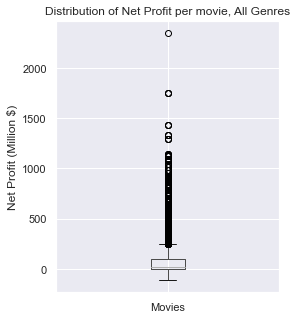

In [408]:
# Create a box and whiskers plot of median profit, to see what the distribution of values looks like
fig, ax = plt.subplots(figsize=(4,5))
millions_df = imdb_tn_split_df[['genres_separated', 'net_profit']].copy()
millions_df.net_profit = millions_df.net_profit / 1000000
millions_df.columns = ['genres_separated', 'Movies']
millions_df\
.boxplot(column='Movies', ax=ax)
ax.set(title='Distribution of Net Profit per movie, All Genres',\
       ylabel='Net Profit (Million $)');


Seems like there are lots of outliers! For our genre graphs we can use the median to mitigate the effect of the outliers.

Lets take a look at a graph of net profit, to see which types of movies create the most profit!

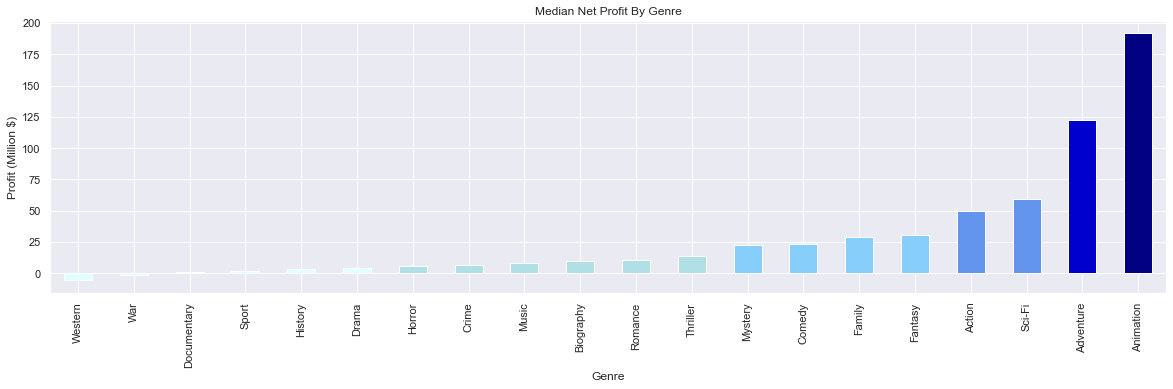

In [272]:
# Graph of how much profit a movie in each genre made, by median value
fig, ax = plt.subplots(figsize=(20,5))
genre_df = genre_df.sort_values('median_net_profit')
net_profit = genre_df.median_net_profit
net_profit.plot.bar(ax=ax, color=\
     ["lightcyan" if (x < net_profit.quantile(.3)) \
      else 'powderblue' if (x < net_profit.quantile(.6))
      else 'lightskyblue' if (x < net_profit.quantile(.8))
      else 'cornflowerblue' if (x < net_profit.quantile(.9))
      else 'mediumblue' if (x < net_profit.quantile(.95))
      else 'navy' for x in net_profit]);
ax.set(title='Median Net Profit By Genre', xlabel='Genre', ylabel='Profit (Million $)');

Seems like Animation, Adventure, and Sci-Fi made the most profit-wise. However, Animation studios are radically different from other animation studios, and have a high barrier to entry. So we can focus on the next 3 highest genres, Adventure, Sci-Fi, and Action.

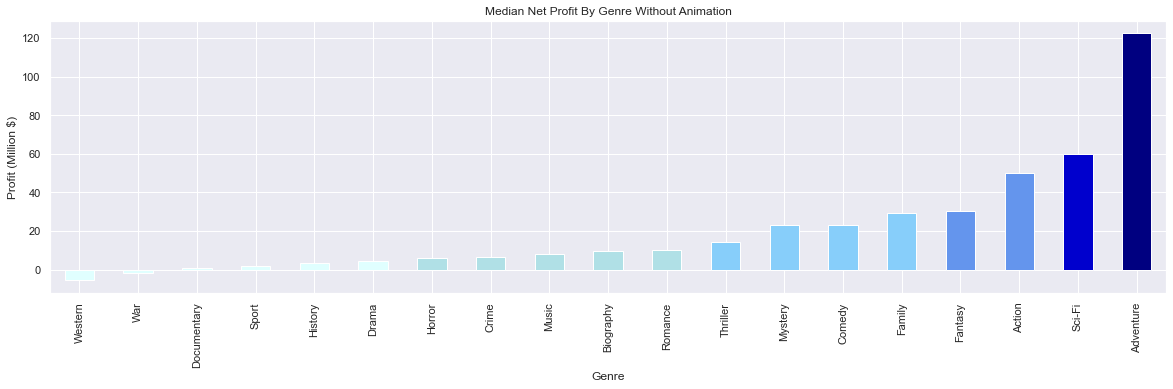

In [413]:
# Graph of how much profit a movie in each genre made, by median value, without 
# animation
fig, ax = plt.subplots(figsize=(20,5))
genre_df = genre_df.sort_values('median_net_profit')
net_profit = genre_df[genre_df.index != 'Animation'].median_net_profit
net_profit.plot.bar(ax=ax, color=\
     ["lightcyan" if (x < net_profit.quantile(.3)) \
      else 'powderblue' if (x < net_profit.quantile(.6))
      else 'lightskyblue' if (x < net_profit.quantile(.8))
      else 'cornflowerblue' if (x < net_profit.quantile(.9))
      else 'mediumblue' if (x < net_profit.quantile(.95))
      else 'navy' for x in net_profit]);
ax.set(title='Median Net Profit By Genre Without Animation', xlabel='Genre', ylabel='Profit (Million $)');

Let's quickly take a look at budgets, to see if our selected genres cost too much money to make.

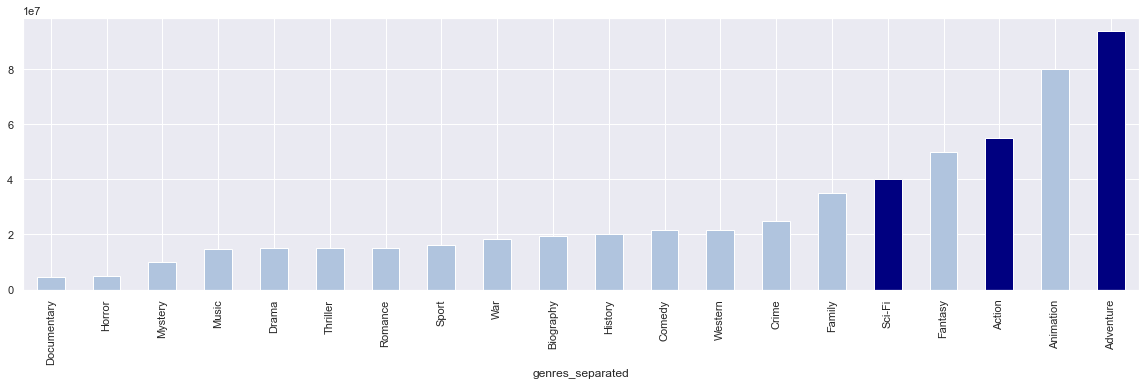

In [364]:
# Graph of how much a movie in each genre cost by median value
fig, ax = plt.subplots(figsize=(20,5))
genre_df = genre_df.sort_values('median_production_budget')
genre_df.median_production_budget.plot.bar(ax=ax, color=\
     ["navy" if (x == 'Action' or x == 'Sci-Fi' or x == 'Adventure' ) \
      else 'lightsteelblue' for x in genre_df.index]);

Hmm, seems like our categories are pretty expensive! They are all in the top 5 of most expensive movies to make! Should we really be choosing these genres? Let's look at the profit ratio to definitively decide if this is a good use of our money.

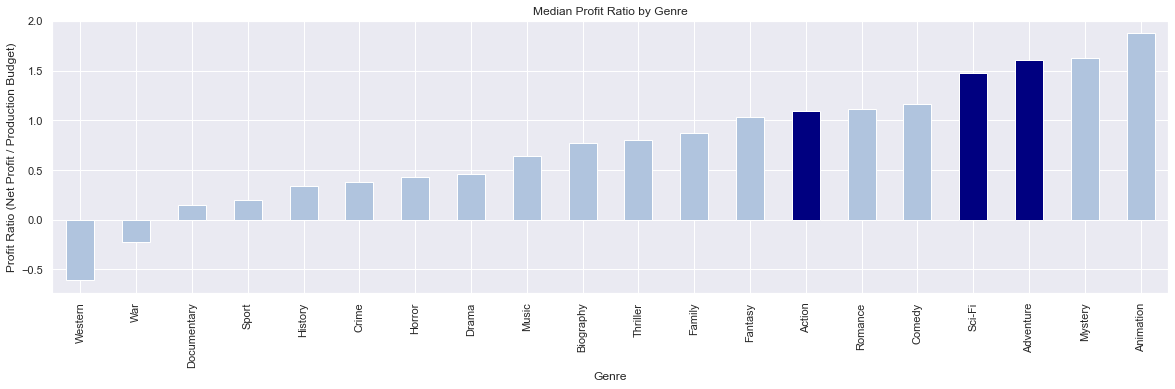

In [341]:
fig, ax = plt.subplots(figsize=(20,5))
genre_df = genre_df.sort_values('median_profit_ratio')
genre_df.median_profit_ratio.plot.bar(ax=ax, color=\
     ["navy" if (x == 'Action' or x == 'Sci-Fi' or x == 'Adventure' ) \
      else 'lightsteelblue' for x in genre_df.index]);
ax.set(title='Median Profit Ratio by Genre', xlabel='Genre', ylabel='Profit Ratio (Net Profit / Production Budget)');

Looks like they aren't so bad! All 3 categories are in the top third by profit ratio, meaning that they shouldn't be money-sinks. Now, we can be more confident that our Adventure, Sci-Fi, or Action movie has a high liklihood of generating money!

# Andrew Yang